<a href="https://colab.research.google.com/github/CoderShad/FIN-ADV-AI/blob/main/Copy_of_C06_Ensemble_Methods_Bagging%2C_Random_Forest%2C_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging

### Bagging
- Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data.
- Bagging: Bootstrap Aggregation.
- Uses a technique known as the bootstrap.
- Reduces variance of individual models in the ensemble
- Can be used to create a tree ensemble


### Bagging: Classification & Regression
- Classification:
    - Aggregates predictions by majority voting.
    - `BaggingClassifier`  in **scikit- learn**
- Regression:
    - Aggregates predictions through averaging.
    - `BaggingRegressor`  in **scikit- learn**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier

SEED =1 ## seeds reduces randomness, good for reproducibility


### Note
#### Bagging
- some instances may be sampled several times for one model,
- other instances may not be sampled at all.

#### Out Of Bag (OOB) instances
- On average,  for each model,  63% of the training instances are sampled.
- The remaining 37% constitute the OOB instances.


#### Ex: Define the bagging classifier with Liver Patient dataset
- To predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender.



In [ ]:
liver = pd.read_csv('https://raw.githubusercontent.com/mjha91/data/main/fi8092/liver_patient.csv', index_col = 0)
X = liver.drop('Liver_disease', axis = 1)
y = liver['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)
liver.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [ ]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(estimator=dt, n_estimators=50, random_state=1) #50 decision trees in the ensemble

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.70


In [ ]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1) #each leaf node in the decision tree must have at least 8 samples - This makes the decision tree less complex, reducing overfitting by preventing very small, overly specific splits

# Instantiate bc
bc = BaggingClassifier(estimator=dt,
            n_estimators=50,
            oob_score=True,
            random_state=1)
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.2f}, OOB accuracy: {:.2f}'.format(acc_test, acc_oob))

Test set accuracy: 0.71, OOB accuracy: 0.68




---



### Random Forest
Random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.
#### Bagging
- Base estimator: Decision Tree,  Logistic Regression,  Neural Net,  . . .
- Each estimator is trained on a distinct bootstrap sample of the training set
- Estimators use all features for training and prediction

#### Random Forests
- Base estimator: Decision Tree
- Each estimator is trained on a different bootstrap sample having the same size as the training set
- RF introduces further randomization in the training of individual trees
- d features are sampled at each node without replacement ```( d < total number  of features  )```
#### Random Forests: Classification & Regression
- Classification:
    * Aggregates predictions by majority voting
    * `RandomForestClassifier`  in `sklearn.ensemble`
- Regression:
    * Aggregates predictions through averaging
    * `RandomForestRegressor`  in `sklearn.ensemble`

In [ ]:
##contains data on bike rentals, with various columns representing different factors that might influence the count of bikes rented.
bike = pd.read_csv('https://raw.githubusercontent.com/mjha91/data/main/fi8092/bikes.csv')
X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [ ]:
# Import RandomForestRegressor
#from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, max_features=0.75, #forest of 25 decision trees; max_features=1.0 by default, Fraction of total features to consider
            random_state=2)

# Fit rf to the training set
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.75, n_estimators=25, random_state=2)

In [ ]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 50.34


#### Feature Importance
- Tree-based methods: enable measuring the importance of each feature in prediction.
- In  sklearn :
    - how much the tree nodes use a particular feature (weighted average) to reduce impurity accessed using the attribute  `feature_importance_`

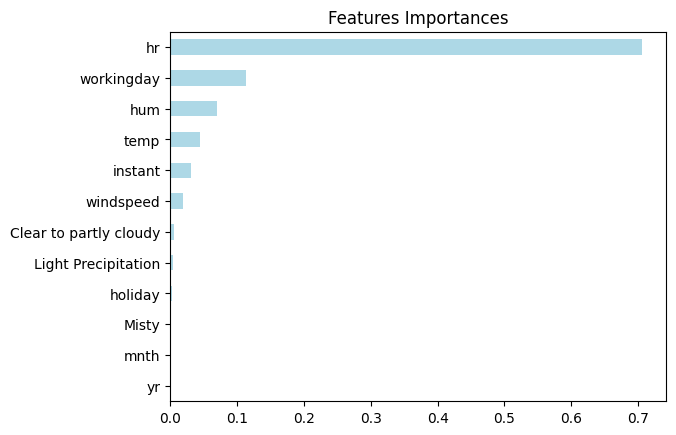

Apparently, hr and workingday are the most important features according to rf.
The importances of these two features add up to more than 90%!


In [ ]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(color='lightblue', kind='barh')
plt.title('Features Importances')
plt.show()

print('Apparently, hr and workingday are the most important features according to rf.\
\nThe importances of these two features add up to more than 90%!')



---



# Boosting
Boosting refers to an ensemble method in which several models are trained sequentially with each model learning from the errors of its predecessors.
### Boosting
- Boosting: Ensemble method combining several weak learners to form a strong learner .
- Weak learner: Model doing slightly better than random guessing.
- Example of weak learner: Decision stump (CART whose maximum depth is 1).
- Train an ensemble of predictors sequentially .
- Each predictor tries to correct its predecessor .


If you remember - real estate example.
Location is important and that woul pick lots of variation. When you run the next iteration, area or number of rooms might handle variation better.

### Gradient Boosting
#### Gradient Boosted Trees
- Sequential correction of predecessor's errors.
- Does not tweak the weights of training instances.
- Fit each predictor is trained using its predecessor's residual errors as labels.
- Gradient Boosted T rees: a CART is used as a base learner
#### Gradient Boosted T rees: Prediction
- Regression:
    - $y_{pred} = y + ηr_1 + ... + ηr_N$
    - In sklearn:  GradientBoostingRegressor
- Classiffication:
    - In sklearn:  GradientBoostingClassifier


#### Example
- Dataset:  Bike Sharing Demand
- Tasks:
    - to predict the bike rental demand using historical weather data from the Capital Bikeshare program in Washington, D.C..
    - using a gradient boosting regressor.
- Doing:
    - Dataset
    - Instantiate a gradient boosting regressor
    - Train the dataset
    - Evaluate the GB regressor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

SEED =1


In [ ]:
#Dataset
bike = pd.read_csv('https://raw.githubusercontent.com/mjha91/data/main/fi8092/bikes.csv')

X = bike[['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'instant',
       'mnth', 'yr', 'Clear to partly cloudy', 'Light Precipitation', 'Misty']]
y = bike['cnt']

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Import GradientBoostingRegressor
#from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, #Each individual regression tree (also called a weak learner) can grow to a maximum depth of 4
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test_gb = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test_gb))

Test set RMSE of gb: 49.960


Random Forest, even though simpler, is doing a better job.